In [1]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('./fundamentals.csv')
data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [3]:
data.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [4]:
data_cleaner = data.copy()
# Dropping columns based off of knowledge and/or null values
data_cleaner.drop(labels=['Unnamed: 0', 'Period Ending', 'For Year', 'Net Income Adjustments', 'Net Income Applicable to Common Shareholders','Net Income-Cont. Operations',
                         'Earnings Before Interest and Tax', 'Earnings Before Tax', 'Misc. Stocks', 'Net Cash Flow', 'Sale and Purchase of Stock',
                        'Total Liabilities & Equity', 'Treasury Stock', 'Earnings Per Share', 'Estimated Shares Outstanding', 'Cash Ratio', 'Current Ratio', 'Quick Ratio', 'Total Current Liabilities',
                         'Gross Margin', 'Operating Margin', 'Pre-Tax Margin', 'Profit Margin'], axis=1, inplace = True)

In [5]:
from skimpy import clean_columns
data_cleaner = clean_columns(data_cleaner)
data_cleaner.head()

56 column names have been cleaned

,ticker_symbol,accounts_payable,accounts_receivable,addl_income_expense_items,after_tax_roe,capital_expenditures,capital_surplus,cash_and_cash_equivalents,changes_in_inventories,common_stocks,...,research_and_development,retained_earnings,sales_general_and_admin,short_term_debt_current_portion_of_long_term_debt,short_term_investments,total_assets,total_current_assets,total_equity,total_liabilities,total_revenue
0,AAL,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,1.330000e+09,0.0,127000000.0,...,0.0,-9.462000e+09,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,-7.987000e+09,2.489100e+10,2.485500e+10
1,AAL,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,2.175000e+09,0.0,5000000.0,...,0.0,-1.129600e+10,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,-2.731000e+09,4.500900e+10,2.674300e+10
2,AAL,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,1.768000e+09,0.0,7000000.0,...,0.0,-8.562000e+09,2.068600e+10,1.677000e+09,6.309000e+09,4.322500e+10,1.175000e+10,2.021000e+09,4.120400e+10,4.265000e+10
3,AAL,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,1.085000e+09,0.0,6000000.0,...,0.0,-1.230000e+09,2.127500e+10,2.231000e+09,5.864000e+09,4.841500e+10,9.985000e+09,5.635000e+09,4.278000e+10,4.099000e+10
4,AAP,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,5.981110e+08,-260298000.0,7000.0,...,0.0,7.149000e+08,2.440721e+09,6.270000e+05,0.000000e+00,4.613814e+09,3.184200e+09,1.210694e+09,3.403120e+09,6.205003e+09


In [6]:
from sklearn.model_selection import train_test_split
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaner.drop(labels=['ticker_symbol', 'net_income'], axis=1),
    data_cleaner['net_income'],
    test_size=0.20,
    random_state=23)

# Forward stepwise regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(LinearRegression(), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2')

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed:    1.9s finished

[2023-03-04 12:18:34] Features: 1/20 -- score: 0.8486861347517305[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  53 out of  53 | elapsed:    0.7s finished

[2023-03-04 12:18:35] Features: 2/20 -- score: 0.8983549916777769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  52 out of  52 | elapsed:    0.7s finished

[2023-03-04 12:18:35] Features: 3/20 -- score: 0.9241502005629052[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [8]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['accounts_receivable', 'addl_income_expense_items', 'capital_surplus',
       'common_stocks', 'cost_of_revenue', 'effect_of_exchange_rate',
       'fixed_assets', 'gross_profit', 'interest_expense', 'investments',
       'liabilities', 'operating_income', 'other_equity',
       'other_investing_activities', 'research_and_development',
       'retained_earnings', 'sales_general_and_admin',
       'short_term_investments', 'total_equity', 'total_revenue'],
      dtype='object')

In [9]:
X_train[X_train.columns[list(sfs1.k_feature_idx_)]]

,accounts_receivable,addl_income_expense_items,capital_surplus,common_stocks,cost_of_revenue,effect_of_exchange_rate,fixed_assets,gross_profit,interest_expense,investments,liabilities,operating_income,other_equity,other_investing_activities,research_and_development,retained_earnings,sales_general_and_admin,short_term_investments,total_equity,total_revenue
1736,139451000.0,87584000.0,5.889106e+09,1.268839e+09,7.033633e+09,0.0,3.120585e+10,3.990853e+09,5.952820e+08,-2.244300e+07,-175214000.0,2.000512e+09,-1.097530e+08,5.579100e+07,0.0,3.552728e+09,8.658170e+08,0.0,1.060092e+10,1.102449e+10
1439,-54000000.0,5000000.0,4.866467e+09,5.630000e+05,1.708200e+10,-20000000.0,1.870719e+09,6.032000e+09,1.190000e+08,0.000000e+00,-56000000.0,1.177000e+09,-5.071540e+08,-1.090000e+08,0.0,7.001755e+09,4.735000e+09,0.0,6.132263e+09,2.311400e+10
1277,0.0,-26736000.0,3.072996e+09,3.695000e+06,4.244479e+09,0.0,1.011900e+08,1.577884e+09,0.000000e+00,-8.242800e+07,-38646000.0,7.164940e+08,-6.900000e+05,8.605000e+06,0.0,1.728953e+09,8.613900e+08,0.0,4.804954e+09,5.822363e+09
1337,36682000.0,8486000.0,0.000000e+00,5.442613e+09,1.561173e+09,-294000.0,1.046888e+09,1.049553e+09,2.331600e+07,3.605700e+07,-5387000.0,1.196800e+07,-3.133000e+06,8.530000e+05,448763000.0,-4.398080e+08,5.888220e+08,186808000.0,4.999672e+09,2.610726e+09
778,-30300000.0,-72400000.0,5.559900e+09,2.800000e+06,1.272300e+09,-8100000.0,4.571000e+08,1.432700e+09,2.055000e+08,1.000000e+07,78500000.0,4.551000e+08,-1.450000e+07,-6.700000e+06,214900000.0,-3.469000e+09,6.240000e+08,0.0,2.079200e+09,2.705000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-210000000.0,-38000000.0,4.359000e+09,1.820000e+08,8.146000e+09,-71000000.0,2.920000e+09,4.087000e+09,1.360000e+08,0.000000e+00,-217000000.0,1.749000e+09,-3.730000e+08,1.236000e+09,627000000.0,6.673000e+09,1.504000e+09,0.0,9.585000e+09,1.223300e+10
950,-170751000.0,17527000.0,2.805349e+09,2.370700e+07,8.923519e+09,0.0,0.000000e+00,2.026480e+09,4.626000e+06,-1.335200e+08,21432000.0,1.262363e+09,-3.090000e+05,1.241220e+08,0.0,4.306256e+09,7.641170e+08,0.0,7.026042e+09,1.095000e+10
1064,-600000.0,1100000.0,0.000000e+00,9.956000e+08,2.513000e+09,-8800000.0,6.027000e+08,1.730200e+09,4.970000e+07,0.000000e+00,-6700000.0,6.030000e+08,-1.860000e+08,1.100000e+06,0.0,9.826000e+08,1.122000e+09,0.0,1.792200e+09,4.243200e+09
742,0.0,0.0,7.221745e+09,8.131000e+06,8.645300e+07,0.0,6.164070e+08,0.000000e+00,5.286800e+07,-5.698754e+09,275456000.0,0.000000e+00,-2.222920e+08,7.528350e+08,0.0,-1.052324e+09,1.843069e+09,0.0,6.328170e+09,2.955641e+09


# EDA

In [10]:
top_20_train = pd.concat([X_train[X_train.columns[list(sfs1.k_feature_idx_)]], y_train], axis = 1)
top_20_train.head()

,accounts_receivable,addl_income_expense_items,capital_surplus,common_stocks,cost_of_revenue,effect_of_exchange_rate,fixed_assets,gross_profit,interest_expense,investments,...,operating_income,other_equity,other_investing_activities,research_and_development,retained_earnings,sales_general_and_admin,short_term_investments,total_equity,total_revenue,net_income
1736,139451000.0,87584000.0,5.889106e+09,1.268839e+09,7.033633e+09,0.0,3.120585e+10,3.990853e+09,595282000.0,-22443000.0,...,2.000512e+09,-109753000.0,55791000.0,0.0,3.552728e+09,8.658170e+08,0.0,1.060092e+10,1.102449e+10,984485000.0
1439,-54000000.0,5000000.0,4.866467e+09,5.630000e+05,1.708200e+10,-20000000.0,1.870719e+09,6.032000e+09,119000000.0,0.0,...,1.177000e+09,-507154000.0,-109000000.0,0.0,7.001755e+09,4.735000e+09,0.0,6.132263e+09,2.311400e+10,620000000.0
1277,0.0,-26736000.0,3.072996e+09,3.695000e+06,4.244479e+09,0.0,1.011900e+08,1.577884e+09,0.0,-82428000.0,...,7.164940e+08,-690000.0,8605000.0,0.0,1.728953e+09,8.613900e+08,0.0,4.804954e+09,5.822363e+09,474338000.0
1337,36682000.0,8486000.0,0.000000e+00,5.442613e+09,1.561173e+09,-294000.0,1.046888e+09,1.049553e+09,23316000.0,36057000.0,...,1.196800e+07,-3133000.0,853000.0,448763000.0,-4.398080e+08,5.888220e+08,186808000.0,4.999672e+09,2.610726e+09,-28845000.0
778,-30300000.0,-72400000.0,5.559900e+09,2.800000e+06,1.272300e+09,-8100000.0,4.571000e+08,1.432700e+09,205500000.0,10000000.0,...,4.551000e+08,-14500000.0,-6700000.0,214900000.0,-3.469000e+09,6.240000e+08,0.0,2.079200e+09,2.705000e+09,131600000.0


<AxesSubplot:xlabel='net_income', ylabel='Count'>

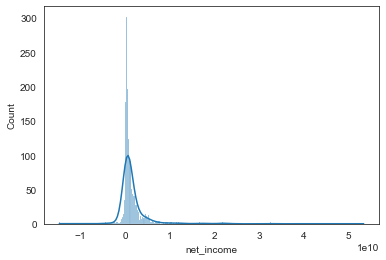

In [11]:
sns.set_style("white")
sns.histplot(top_20_train.net_income, kde = True)

In [12]:
train = pd.concat([X_train, y_train], axis = 1)

In [13]:
all_columns = '+'.join(X_train.columns)

In [14]:
mod0 = smf.ols(formula = 'net_income ~ 1', data = train).fit()
mod0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 04 Mar 2023   Prob (F-statistic):                nan
Time:                        12:18:52   Log-Likelihood:                -33546.
No. Observations:                1424   AIC:                         6.709e+04
Df Residuals:                    1423   BIC:                         6.710e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.744e+09   1.09e+08     15.972      0.000    1.53e+09    1.96e+09
==============================================================================
Omnibus:                     1672.666   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168733.800
Skew:                           6.010   Prob(JB):                         0.00
Kurtosis:                      54.955   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
top_20_preds = '+'.join(top_20_train.columns.difference(['net_income']))
top_20_preds

'accounts_receivable+addl_income_expense_items+capital_surplus+common_stocks+cost_of_revenue+effect_of_exchange_rate+fixed_assets+gross_profit+interest_expense+investments+liabilities+operating_income+other_equity+other_investing_activities+research_and_development+retained_earnings+sales_general_and_admin+short_term_investments+total_equity+total_revenue'

In [16]:
mod1 = smf.ols(formula = 'net_income ~' + top_20_preds, data = top_20_train).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2484.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:18:52   Log-Likelihood:                -30987.
No. Observations:                1424   AIC:                         6.202e+04
Df Residuals:                    1403   BIC:                         6.213e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.839e+07   2.25e+07     -3.036      0.002   -1.13e+08   -2.42e+07
accounts_receivable           -0.1785      0.031     -5.710      0.000      -0.240      -0.117
addl_income_expense_items      0.4231      0.033     12.727      0.000       0.358       0.488
capital_surplus                0.0068      0.003      2.124      0.034       0.001       0.013
common_stocks                 -0.0451      0.004    -10.735      0.000      -0.053      -0.037
cost_of_revenue               -0.0972      0.008    -12.151      0.000      -0.113      -0.082
effect_of_exchange_rate        0.8782      0.143      6.161      0.000       0.599       1.158
fixed_assets                  -0.0114      0.002     -7.528      0.000      -0.014      -0.008
gross_profit                  -0.1746      0.007    -26.236      0.000      -0.188      -0.162
interest_expense              -0.3644      0.035    -10.480      0.000      -0.433      -0.296
investments                   -0.0336      0.004     -8.959      0.000      -0.041      -0.026
liabilities                   -0.0766      0.010     -7.777      0.000      -0.096      -0.057
operating_income               0.6992      0.009     79.070      0.000       0.682       0.717
other_equity                  -0.0434      0.010     -4.532      0.000      -0.062      -0.025
other_investing_activities    -0.0044      0.007     -0.662      0.508      -0.018       0.009
research_and_development       0.1226      0.023      5.443      0.000       0.078       0.167
retained_earnings              0.0236      0.002     11.145      0.000       0.019       0.028
sales_general_and_admin        0.0515      0.008      6.738      0.000       0.037       0.066
short_term_investments         0.0620      0.005     12.628      0.000       0.052       0.072
total_equity                   0.0239      0.003      7.983      0.000       0.018       0.030
total_revenue                  0.0997      0.008     12.715      0.000       0.084       0.115
==============================================================================
Omnibus:                      607.388   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35723.737
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                      27.426   Cond. No.                     7.78e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$E(Y) = -6.839\times10^7 - 0.1785X_1 + 0.4231X_2 - 0.0068X_3 - 0.0451X_4 - 0.0972X_5 + 0.8782X_6 - 0.0114X_7 - 0.1746X_8 - 0.3644X_9 - 0.0336X_{10} - 0.0766X_{11} + 0.6992X_{12} - 0.0434X_{13} - 0.0044X_{14} + 0.1226X_{15} + 0.0236X_{16} + 0.0515X_{17} + 0.0620X_{18} + 0.0239X_{19} + 0.0997X_{20}$

Text(0, 0.5, 'Residuals')

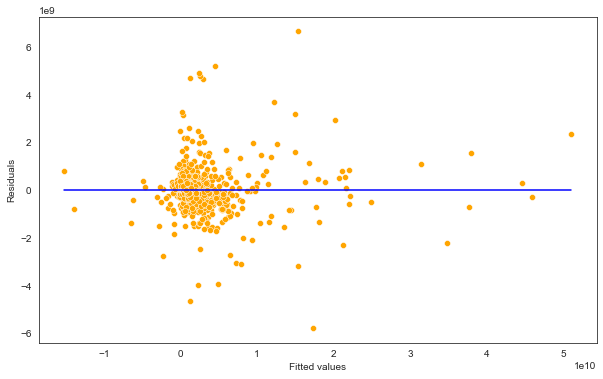

In [17]:
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(x = (mod1.fittedvalues), y=(mod1.resid),color = 'orange')
sns.lineplot(x = [mod1.fittedvalues.min(),mod1.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

<AxesSubplot:xlabel='other_investing_activities', ylabel='net_income'>

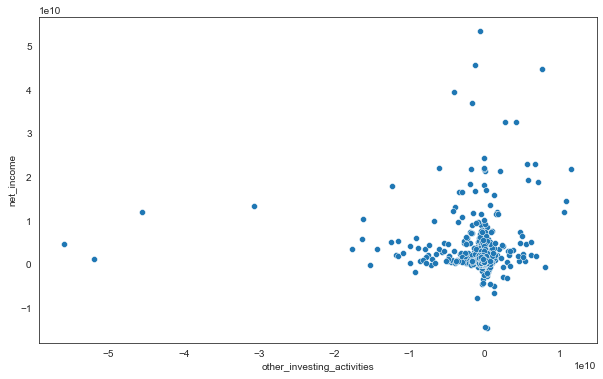

In [18]:
sns.scatterplot(x = 'other_investing_activities', y = 'net_income', data = top_20_train) # Drop

In [19]:
# sns.pairplot(top_20_train)

In [20]:
# top_20_train.total_equity.describe()

# Outliers & high leverage points

## Outliers

In [21]:
outliers = mod1.outlier_test()
outliers

,student_resid,unadj_p,bonf(p)
1736,0.164765,0.869152,1.0
1439,-0.394139,0.693538,1.0
1277,-0.094346,0.924848,1.0
1337,0.246413,0.805398,1.0
778,0.058009,0.953750,1.0
...,...,...,...
1512,1.579788,0.114381,1.0
950,-0.201665,0.840208,1.0
1064,0.221781,0.824517,1.0
742,-0.008698,0.993061,1.0


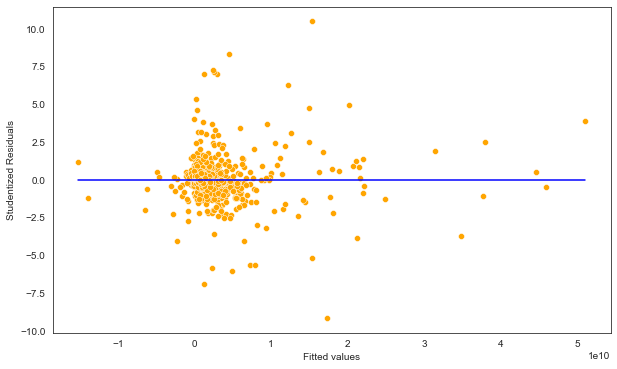

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = (mod1.fittedvalues), y = (outliers.student_resid), color = 'orange');
sns.lineplot(x = [mod1.fittedvalues.min(), mod1.fittedvalues.max()],y = [0,0],color = 'blue');
plt.xlabel('Fitted values');
plt.ylabel('Studentized Residuals');

In [23]:
print('Number of outliers:',np.sum((np.abs(outliers.student_resid) > 3)))
print('Proportion of high leverage points:',np.sum((np.abs(outliers.student_resid) > 3))/mod1.nobs)

Number of outliers: 36
Proportion of high leverage points: 0.025280898876404494


## High leverage points

In [24]:
influence = mod1.get_influence()
leverage = influence.hat_matrix_diag

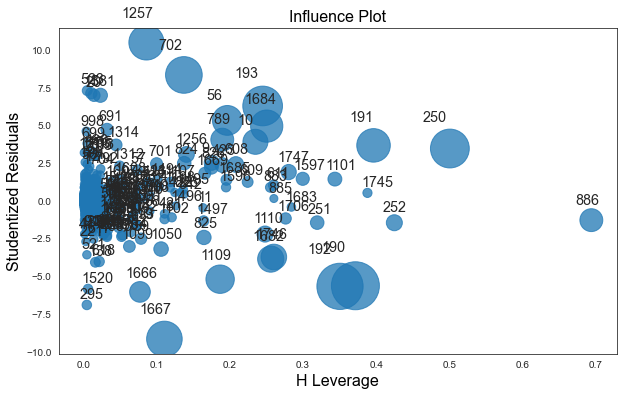

In [25]:
plt.rcParams['figure.figsize'] = (10,6);
sm.graphics.influence_plot(mod1);

In [26]:
avg_leverage = (mod1.df_model+1)/mod1.nobs
high_leverage = 4*avg_leverage
print('Number of high leverage points:',np.sum(leverage > high_leverage))
print('Proportion of high leverage points:',np.sum(leverage > high_leverage)/mod1.nobs)

Number of high leverage points: 78
Proportion of high leverage points: 0.054775280898876406


## Influential points

In [27]:
top_20_train

,accounts_receivable,addl_income_expense_items,capital_surplus,common_stocks,cost_of_revenue,effect_of_exchange_rate,fixed_assets,gross_profit,interest_expense,investments,...,operating_income,other_equity,other_investing_activities,research_and_development,retained_earnings,sales_general_and_admin,short_term_investments,total_equity,total_revenue,net_income
1736,139451000.0,87584000.0,5.889106e+09,1.268839e+09,7.033633e+09,0.0,3.120585e+10,3.990853e+09,5.952820e+08,-2.244300e+07,...,2.000512e+09,-1.097530e+08,5.579100e+07,0.0,3.552728e+09,8.658170e+08,0.0,1.060092e+10,1.102449e+10,9.844850e+08
1439,-54000000.0,5000000.0,4.866467e+09,5.630000e+05,1.708200e+10,-20000000.0,1.870719e+09,6.032000e+09,1.190000e+08,0.000000e+00,...,1.177000e+09,-5.071540e+08,-1.090000e+08,0.0,7.001755e+09,4.735000e+09,0.0,6.132263e+09,2.311400e+10,6.200000e+08
1277,0.0,-26736000.0,3.072996e+09,3.695000e+06,4.244479e+09,0.0,1.011900e+08,1.577884e+09,0.000000e+00,-8.242800e+07,...,7.164940e+08,-6.900000e+05,8.605000e+06,0.0,1.728953e+09,8.613900e+08,0.0,4.804954e+09,5.822363e+09,4.743380e+08
1337,36682000.0,8486000.0,0.000000e+00,5.442613e+09,1.561173e+09,-294000.0,1.046888e+09,1.049553e+09,2.331600e+07,3.605700e+07,...,1.196800e+07,-3.133000e+06,8.530000e+05,448763000.0,-4.398080e+08,5.888220e+08,186808000.0,4.999672e+09,2.610726e+09,-2.884500e+07
778,-30300000.0,-72400000.0,5.559900e+09,2.800000e+06,1.272300e+09,-8100000.0,4.571000e+08,1.432700e+09,2.055000e+08,1.000000e+07,...,4.551000e+08,-1.450000e+07,-6.700000e+06,214900000.0,-3.469000e+09,6.240000e+08,0.0,2.079200e+09,2.705000e+09,1.316000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,-210000000.0,-38000000.0,4.359000e+09,1.820000e+08,8.146000e+09,-71000000.0,2.920000e+09,4.087000e+09,1.360000e+08,0.000000e+00,...,1.749000e+09,-3.730000e+08,1.236000e+09,627000000.0,6.673000e+09,1.504000e+09,0.0,9.585000e+09,1.223300e+10,2.420000e+09
950,-170751000.0,17527000.0,2.805349e+09,2.370700e+07,8.923519e+09,0.0,0.000000e+00,2.026480e+09,4.626000e+06,-1.335200e+08,...,1.262363e+09,-3.090000e+05,1.241220e+08,0.0,4.306256e+09,7.641170e+08,0.0,7.026042e+09,1.095000e+10,9.118440e+08
1064,-600000.0,1100000.0,0.000000e+00,9.956000e+08,2.513000e+09,-8800000.0,6.027000e+08,1.730200e+09,4.970000e+07,0.000000e+00,...,6.030000e+08,-1.860000e+08,1.100000e+06,0.0,9.826000e+08,1.122000e+09,0.0,1.792200e+09,4.243200e+09,4.379000e+08
742,0.0,0.0,7.221745e+09,8.131000e+06,8.645300e+07,0.0,6.164070e+08,0.000000e+00,5.286800e+07,-5.698754e+09,...,0.000000e+00,-2.222920e+08,7.528350e+08,0.0,-1.052324e+09,1.843069e+09,0.0,6.328170e+09,2.955641e+09,6.323920e+08


In [28]:
top_20_train.iloc[28,:]

accounts_receivable           3.490000e+08
addl_income_expense_items    -1.116000e+09
capital_surplus               4.064600e+10
common_stocks                 1.788000e+09
cost_of_revenue               1.644600e+10
effect_of_exchange_rate      -3.000000e+07
fixed_assets                  1.603000e+10
gross_profit                  3.082100e+10
interest_expense              0.000000e+00
investments                  -5.019000e+09
liabilities                  -2.800000e+09
operating_income              9.213000e+09
other_equity                 -4.682000e+09
other_investing_activities    1.680000e+08
research_and_development      8.168000e+09
retained_earnings             3.998500e+10
sales_general_and_admin       1.277600e+10
short_term_investments        2.690000e+09
total_equity                  5.302000e+10
total_revenue                 4.726700e+10
net_income                    6.168000e+09
Name: 1099, dtype: float64

In [29]:
top_20_no_influential = top_20_train.drop(top_20_train.iloc[np.intersect1d(np.where(np.abs(outliers.student_resid) > 3)[0],
                                         (np.where(leverage > high_leverage)[0]))].index)

In [30]:
mod2 = smf.ols(formula = 'net_income ~' + top_20_preds, data = top_20_no_influential).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             net_income   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     3122.
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:19:02   Log-Likelihood:                -30230.
No. Observations:                1405   AIC:                         6.050e+04
Df Residuals:                    1384   BIC:                         6.061e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -6.869e+07    1.8e+07     -3.820      0.000   -1.04e+08   -3.34e+07
accounts_receivable           -0.0947      0.027     -3.552      0.000      -0.147      -0.042
addl_income_expense_items      0.5359      0.031     17.307      0.000       0.475       0.597
capital_surplus               -0.0076      0.003     -2.672      0.008      -0.013      -0.002
common_stocks                 -0.0256      0.004     -5.953      0.000      -0.034      -0.017
cost_of_revenue               -0.1314      0.007    -18.056      0.000      -0.146      -0.117
effect_of_exchange_rate        0.4844      0.142      3.404      0.001       0.205       0.763
fixed_assets                  -0.0073      0.001     -5.841      0.000      -0.010      -0.005
gross_profit                  -0.1900      0.006    -30.299      0.000      -0.202      -0.178
interest_expense              -0.3660      0.035    -10.595      0.000      -0.434      -0.298
investments                   -0.0220      0.004     -5.499      0.000      -0.030      -0.014
liabilities                   -0.0520      0.009     -5.607      0.000      -0.070      -0.034
operating_income               0.7048      0.007     94.205      0.000       0.690       0.720
other_equity                  -0.0435      0.009     -5.068      0.000      -0.060      -0.027
other_investing_activities    -0.0057      0.006     -1.023      0.306      -0.017       0.005
research_and_development       0.0811      0.019      4.288      0.000       0.044       0.118
retained_earnings              0.0128      0.002      6.315      0.000       0.009       0.017
sales_general_and_admin        0.0517      0.006      8.452      0.000       0.040       0.064
short_term_investments         0.0419      0.005      9.020      0.000       0.033       0.051
total_equity                   0.0253      0.003      9.702      0.000       0.020       0.030
total_revenue                  0.1315      0.007     18.374      0.000       0.117       0.146
==============================================================================
Omnibus:                      784.565   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49329.561
Skew:                           1.799   Prob(JB):                         0.00
Kurtosis:                      31.805   Cond. No.                     7.20e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.2e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$E(Y) = -6.869\times10^7 - 0.0947X_1 + 0.5359X_2 - 0.0076X_3 - 0.0256X_4 - 0.1314X_5 + 0.4844X_6 - 0.0073X_7 - 0.1900X_8 - 0.3660X_9 - 0.0220X_{10} - 0.0520X_{11} + 0.7048X_{12} - 0.0435X_{13} - 0.0057X_{14} + 0.0811X_{15} + 0.0128X_{16} + 0.0517X_{17} + 0.0419X_{18} + 0.0253X_{19} + 0.1315X_{20}$

In [31]:
# outliers = mod2.outlier_test()

Text(0, 0.5, 'Residuals')

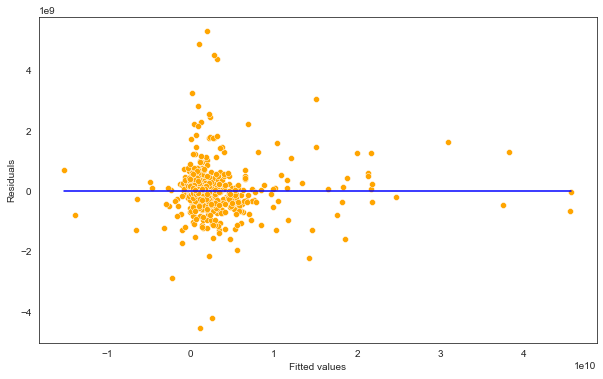

In [32]:
plt.rcParams['figure.figsize'] = (10,6)
sns.scatterplot(x = (mod2.fittedvalues), y=(mod2.resid),color = 'orange')
sns.lineplot(x = [mod2.fittedvalues.min(),mod2.fittedvalues.max()],y = [0,0],color = 'blue')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

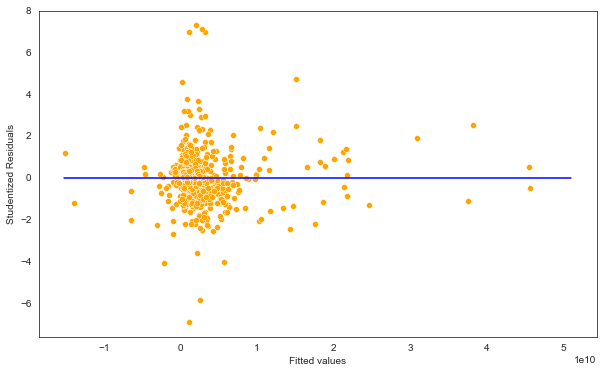

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x = (mod2.fittedvalues), y = (outliers.student_resid), color = 'orange');
sns.lineplot(x = [mod1.fittedvalues.min(), mod1.fittedvalues.max()],y = [0,0],color = 'blue');
plt.xlabel('Fitted values');
plt.ylabel('Studentized Residuals');

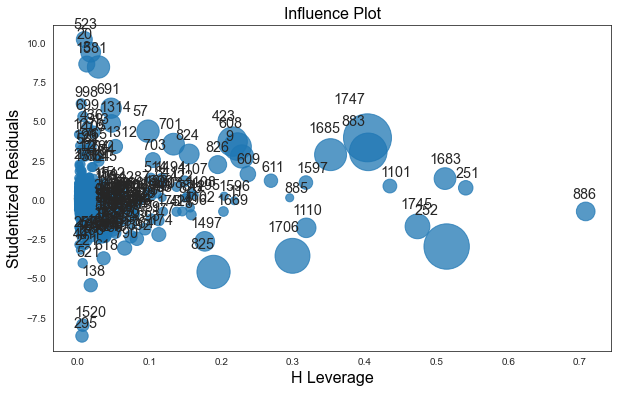

In [34]:
plt.rcParams['figure.figsize'] = (10,6);
sm.graphics.influence_plot(mod2);

In [35]:
test = pd.concat([X_test, y_test], axis = 1)

In [36]:
y_train_pred = mod1.predict(top_20_train)
np.sqrt(((top_20_train.net_income - y_train_pred)**2).mean())

682659742.4299608

In [37]:
y_pred = mod1.predict(test)
np.sqrt(((test.net_income - y_pred)**2).mean())

863123847.860895

In [38]:
y_train_pred = mod2.predict(top_20_train)
np.sqrt(((top_20_train.net_income - y_train_pred)**2).mean())

779518523.4249133

In [39]:
y_pred = mod2.predict(test)
np.sqrt(((test.net_income - y_pred)**2).mean())

761973773.5578208

# VIF Round 1

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = top_20_train[top_20_train.columns.difference(['net_income'])]
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                       feature         VIF
0                        const    1.527211
1          accounts_receivable    1.836944
2    addl_income_expense_items    1.478228
3              capital_surplus    4.104741
4                common_stocks    5.372663
5              cost_of_revenue  138.363230
6      effect_of_exchange_rate    1.708141
7                 fixed_assets    2.522943
8                 gross_profit   22.915822
9             interest_expense    4.338043
10                 investments    3.259326
11                 liabilities    1.787193
12            operating_income    6.254856
13                other_equity    2.357712
14  other_investing_activities    1.322412
15    research_and_development    2.512677
16           retained_earnings    8.365182
17     sales_general_and_admin   12.827135
18      short_term_investments    2.684102
19                total_equity   19.116567
20               total_revenue  253.498062


# LASSO CV

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    top_20_no_influential.drop(labels=['net_income'], axis=1),
    top_20_no_influential['net_income'],
    test_size=0.20,
    random_state=23)

In [60]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import r2_score, make_scorer
from sklearn.model_selection import cross_val_score

# search for an optimal value of alpha for Lasso
alpha_range = [1e-15] 
for _ in range(18):
    alpha_range.append(alpha_range[-1]*10)
print(alpha_range)
alpha_scores = []
for alpha in alpha_range:
    #rg = Lasso(alpha=alpha, max_iter=10000, tol=0.1)
    rg = Ridge(alpha=alpha)
    lassoreg = make_pipeline(StandardScaler(with_mean=False), rg)
    scores = cross_val_score(lassoreg, X_train, y_train, scoring='r2', cv=2)
    alpha_scores.append(scores.mean())
print(alpha_scores)

[1e-15, 1.0000000000000002e-14, 1.0000000000000002e-13, 1.0000000000000002e-12, 1.0000000000000001e-11, 1.0000000000000002e-10, 1.0000000000000003e-09, 1.0000000000000004e-08, 1.0000000000000004e-07, 1.0000000000000004e-06, 1.0000000000000004e-05, 0.00010000000000000005, 0.0010000000000000005, 0.010000000000000005, 0.10000000000000006, 1.0000000000000007, 10.000000000000007, 100.00000000000007, 1000.0000000000007]
[0.9700955447988651, 0.9700955447988651, 0.9700955447988653, 0.9700955447988593, 0.9700955447988098, 0.9700955447983088, 0.9700955447933082, 0.9700955447432922, 0.9700955442431318, 0.9700955392414865, 0.9700954892208575, 0.9700949885971379, 0.9700899408344417, 0.9700355206273482, 0.9692480797051513, 0.9621839016416012, 0.9461366784339427, 0.9060116727761942, 0.7875723834669153]


Text(0, 0.5, 'THe R-squared for Cross-Validated')

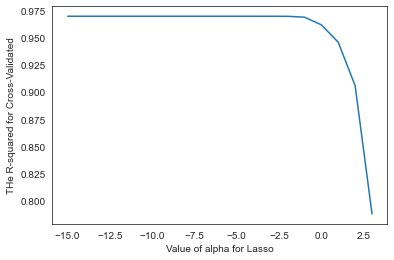

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(np.log10(alpha_range), alpha_scores)
plt.xlabel('Value of alpha for Lasso')
plt.ylabel('THe R-squared for Cross-Validated')

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train) 

X_std_train = scaler.transform(X_train)

X_std_test = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LassoCV
# Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000, tol=0.1)
# Fit model
model.fit(X_std_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0, tol=0.1)

In [64]:
model.alpha_

3515043.440173572

In [65]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_/100, max_iter = 100000)
lasso_best.fit(X_std_train, y_train)
print('R squared training set', round(lasso_best.score(X_std_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_std_test, y_test)*100, 2))

R squared training set 97.96
R squared test set 96.81


In [66]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_, max_iter = 100000)
lasso_best.fit(X_std_train, y_train)
print('R squared training set', round(lasso_best.score(X_std_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_std_test, y_test)*100, 2))

R squared training set 97.87
R squared test set 96.15


In [71]:
list(zip(lasso_best.coef_, top_20_no_influential.drop('net_income', axis=1)))

[(-46932285.45836689, 'accounts_receivable'),
 (237611514.32643747, 'addl_income_expense_items'),
 (-4378999.80466208, 'capital_surplus'),
 (-66692917.997120135, 'common_stocks'),
 (-1719753713.6491168, 'cost_of_revenue'),
 (78906803.46311468, 'effect_of_exchange_rate'),
 (-93327908.16265853, 'fixed_assets'),
 (-2043189705.1420503, 'gross_profit'),
 (-322721689.7001377, 'interest_expense'),
 (-264851235.2652045, 'investments'),
 (-143258686.85908464, 'liabilities'),
 (3411859332.8949714, 'operating_income'),
 (-77127278.7136617, 'other_equity'),
 (-52322414.21820792, 'other_investing_activities'),
 (108384209.13998479, 'research_and_development'),
 (421883943.2006903, 'retained_earnings'),
 (726100274.7711635, 'sales_general_and_admin'),
 (216281558.10553512, 'short_term_investments'),
 (544815090.1273032, 'total_equity'),
 (2366448301.2740693, 'total_revenue')]

# GridSearch CV

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
class SFSRegression():
    def __init__(self, n_features_to_select=None, **kargs ):
        self.lm=LinearRegression()
        self.sfs=SFS(self.lm, n_features_to_select=n_features_to_select)
    def fit(self,X,y):
        self.sfs.fit(X,y)
        self.lm.fit(self.sfs.transform(X),y)
        return self
    
    def predict(self,X):
        return self.lm.predict(self.sfs.transform(X))
    
    def get_params(self, deep=True):
        return {"n_features_to_select": self.sfs.n_features_to_select}
    def set_params(self, **params):
        n_features_to_select=params['n_features_to_select']
        self.sfs=SFS(self.lm, n_features_to_select=n_features_to_select)
        return self

In [45]:
import sklearn
print(sklearn.__version__)

1.2.1


In [43]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X_train2 = top_20_train[top_20_train.columns.difference(['net_income'])]
y_train2 = top_20_train['net_income']

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = {'n_features_to_select': list(range(1, 11))}


# step-3: perform grid search
# 3.1 specify model
# lm = LinearRegression()
# lm.fit(X_train, y_train)
# sfs = SFS(lm)  
sfs=SFSRegression()

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = sfs, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train2, y_train2)   

TypeError: __init__() got an unexpected keyword argument 'n_features_to_select'

# `statsmodel`

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [ ]:
X = top_20_train[top_20_train.columns.difference(['net_income'])]
y = top_20_train['net_income']

#Defining a scaler object
scaler = StandardScaler()

#The scaler object will contain the mean and variance of each column (predictor) of X. 
#These values will be useful to scale test data based on the same mean and variance as obtained on train data
scaler.fit(X)

#Using the scaler object (or the values of mean and variance stored in it) to standardize X (or train data)
Xstd = scaler.transform(X)

In [ ]:
#Creating a range of values of the tuning parameter to visualize the lasso coefficients
#for different values of the tuning parameter
alphas = 10**np.linspace(10,5,100)*0.1

In [ ]:
alphas

In [ ]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(Xstd, y)
    coefs.append(lasso.coef_)

In [ ]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
# plt.legend(train.columns[1:6]);
#plt.plot([lassocv.alpha_,lassocv.alpha_],[-0.4,0.25],':')
# plt.legend(train.columns[1:6]);

In [ ]:
#Let us use cross validation to find the optimal value of the tuning parameter - lambda
#For the optimal lambda, the cross validation error will be the least

#Note that we are reducing the range of alpha so as to better visualize the minimum
# alphas = 10**np.linspace(-1,-5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(Xstd, y)

#Optimal value of the tuning parameter - lamda
lassocv.alpha_

In [ ]:
#Visualizing the LOOCV (leave one out cross validatation error vs lambda)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(lassocv.alphas_,lassocv.mse_path_.mean(axis=1))
plt.plot([lassocv.alpha_,lassocv.alpha_],[0.145,0.151],':')
plt.xlabel('$\lambda$')
plt.ylabel('Cross-validation error')

In [ ]:
#Visualizing the shrinkage in lasso coefficients with increasing values of the tuning parameter lambda
# alphas = 10**np.linspace(10,-2,1000)*0.1
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
# plt.legend(train.columns[1:6]);
plt.plot([lassocv.alpha_,lassocv.alpha_],[-2e9,2e9],':')
# plt.legend(train.columns[1:6]);

In [ ]:
lasso.coef_